- Liam Tessendorf - 20-701-348
- Maximilian von Willich - 17-944-349

# 1. Preferential Attachment

### Task
Build networks using the Barabási‑Albert model. Connect `m = 3` for each new node and grow the network until `N = 50, 100, 500, 1000, 5000`. Then compute some network properties and compare them with randomized versions of the networks.

In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import powerlaw
from networkx.generators.random_graphs import gnm_random_graph
from scipy.stats import poisson

warnings.filterwarnings("ignore", category=DeprecationWarning)

## 1.1

**(1 point)** Compute the following network properties:
   - Average clustering coefficient
   - Assortativity
   - Average shortest path length
   - Diameter

In [8]:
N_values = [50, 100, 500, 1000, 5000]

barabasi_graphs = [nx.barabasi_albert_graph(n, m=3, seed=42) for n in N_values]

randomized_measures = []
randomized_graphs = []
n_trials = 50
for g in barabasi_graphs:
    avg_clust_rand, assortativity_rand, avg_shortest_path_rand, dia_rand = [], [], [], []
    for _ in range(n_trials):
        random_graph = nx.random_reference(g, connectivity=False, seed=None)
        randomized_graphs.append(random_graph)
        avg_clust_rand.append(nx.average_clustering(random_graph))
        assortativity_rand.append(nx.degree_assortativity_coefficient(random_graph))
        avg_shortest_path_rand.append(nx.average_shortest_path_length(random_graph))
        dia_rand = nx.diameter(random_graph)

    randomized_measures.append({
        'N': len(g),
        'avg_clustering': np.mean(avg_clust_rand),
        'assortativity': np.mean(assortativity_rand),
        'avg_shortest_path': np.mean(avg_shortest_path_rand),
        'diameter': np.mean(dia_rand)
    })

In [9]:
avg_clust = [nx.average_clustering(g) for g in barabasi_graphs]

assortativity = [nx.degree_assortativity_coefficient(g) for g in barabasi_graphs]

avg_shortest_path = [nx.average_shortest_path_length(g) for g in barabasi_graphs]

dia = [nx.diameter(g) for g in barabasi_graphs]

## 1.2
**(1 point)** Compare the computed properties by scatterplots with the same measures on randomized versions of the networks (use log x-axis).

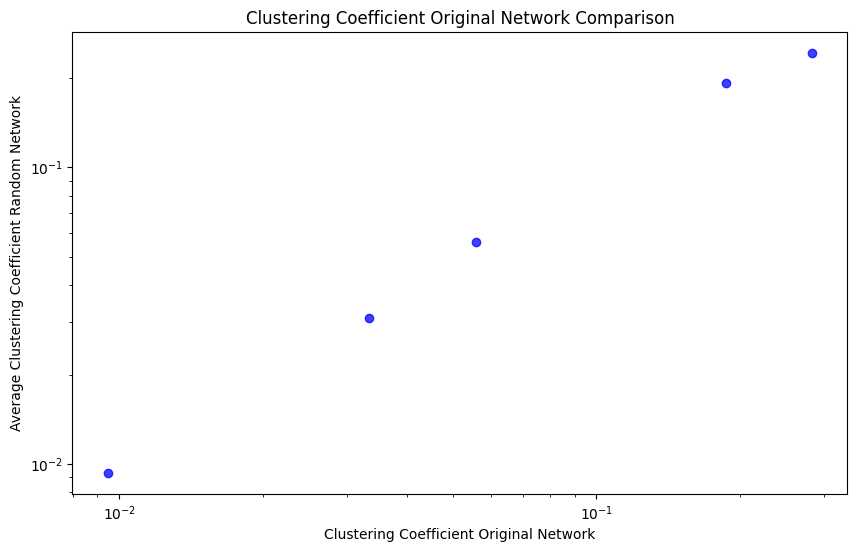

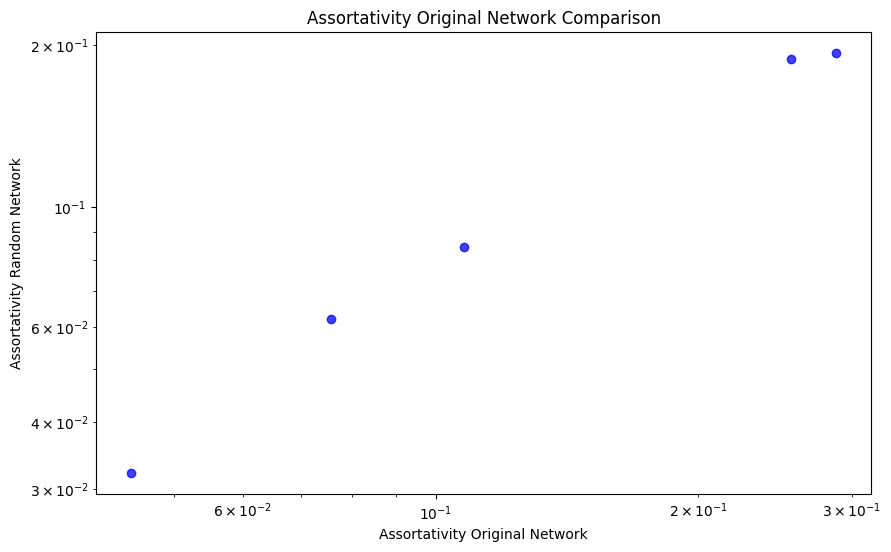

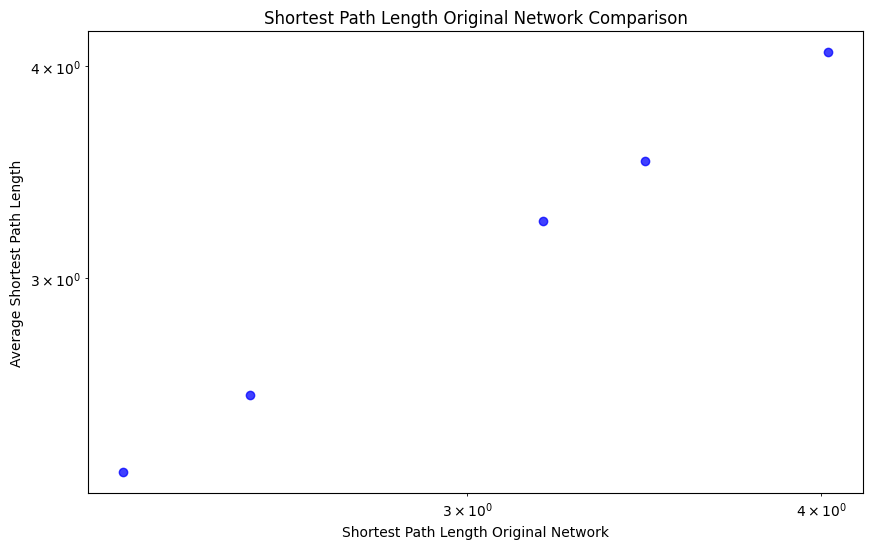

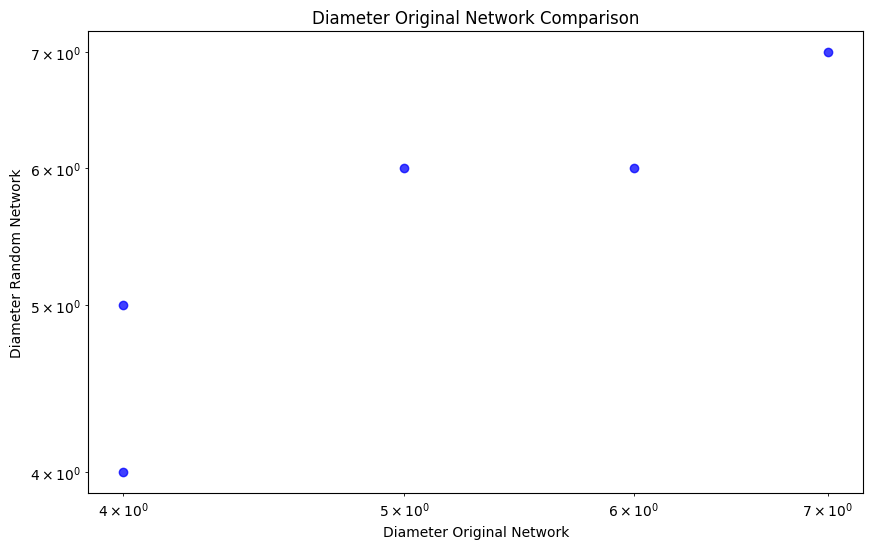

In [14]:
def plot_comparison(x, y, label_x, label_y):
    x = [abs(x) for x in x]
    y = [abs(y) for y in y]
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Original", color="blue", alpha=0.75)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(label_x + " Comparison")
    plt.show()

plot_comparison(
    avg_clust,
    list(map(lambda x: x["avg_clustering"], randomized_measures)),
    "Clustering Coefficient Original Network",
    "Average Clustering Coefficient Random Network",
)
plot_comparison(
    assortativity,
    list(map(lambda x: x["assortativity"], randomized_measures)),
    "Assortativity Original Network",
    "Assortativity Random Network",
)
plot_comparison(
    avg_shortest_path,
    list(map(lambda x: x["avg_shortest_path"], randomized_measures)),
    "Shortest Path Length Original Network",
    "Average Shortest Path Length",
)
plot_comparison(dia, list(map(lambda x: x["diameter"], randomized_measures))
                , "Diameter Original Network", "Diameter Random Network")

## 1.3

**(1 point)** Which measures are relatively unchanged by randomization? Explain why.


The degree distribution has a power-law form in both Barabasi-Albert and random graphs. Therefore only the isolated effects of preferential attachement and sequential growth on the higher-order properties are important for the differences. Distinguishing the effects of preferential attachment on higher order properties, which are not explained through power-law degree distribution is difficult to approach in a systematic manner.

- Assortativity could be affected by preferential attachement. It leads to later nodes (which tend to have lower degrees) preferring to attach to more high degree nodes. This could lead to systematic disassortativity in the BA graphs.
- As the early, high degree nodes form a hub (preferential attachement & sequential node adding), paths quickly converge to this hub. This can lead to a smaller diameter than in random graphs. Though the dissasortativity leads to fewer fast connections among low degree nodes. Therefore the lower diameter doesn't mean that the average shortest path is lower as well.

- In conclusion assortativity and diameter seems to be higher in random graphs based on power law degree distribution, because they are not based on preferential attachment and sequential adding of nodes.
- In contrast the **clustering coefficient** and **average shortest path** seem to only be dependent on the degree distribution and rather independent of the two unique properties of the BA model.

Note 1: The validity of the interpretation might be improved by testing whether the randomized graph is fully connected.

Note 2: I tried to be more systematic about this task by finding scientific papers on comparing how BA graphs are different from power-law degree distribution, but didn't find any. Also I talked on Monday 04.11.24 with a TA to find out how to be more systematic about it, but he didn't really know either.

# 2 Scale-free Distribution

In [ ]:
gml_files = [f for f in os.listdir("datasets/") if f.endswith(".gml")]

graphs = {
    path.split(".")[0]: nx.read_gml(os.path.join("datasets/", path))
    for path in gml_files
}

## 2.1
**(1 point)** Compute the exponent γ of the power-law distribution fit `p(k) ∼ k^(-γ)` of the network degree distribution and determine the corresponding error.
   *Hint: In Python, you can fit a power-law distribution using the `powerlaw` package.*


In [ ]:
degrees = {}
gamma_values = {}
errors = {}

for name, g in graphs.items():
    d = [degree for node, degree in g.degree()]
    degrees[name] = d
    fit = powerlaw.Fit(d, discrete=True)

    gamma = fit.power_law.alpha
    gamma_error = fit.power_law.sigma

    gamma_values[name] = gamma
    errors[name] = gamma_error

for name, g in graphs.items():
    print("\n")
    print(f"{name} Network")
    print("Gamma: ", gamma_values[name])
    print("Error: ", errors[name])

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
xmin progress: 99%

Macaque Network
Gamma:  5.771172341306776
Error:  0.6886594089008911


Actors Network
Gamma:  2.126849196646938
Error:  0.0028982213836374767


Internet Network
Gamma:  1.9157988569314632
Error:  0.013180032052154154


Flavor Network
Gamma:  5.659919105036032
Error:  0.2527195962133422


## 2.2

 **(1 point)** Produce a single plot showing:
   - The empirical degree distribution
   - The power-law fit
   - The Poisson fit
   - The exponential distribution with mean value equal to ⟨k⟩

  **Question**: Which distribution is more likely to describe the data?  
  *Hint: Make sure the data is presented correctly, use a logarithmic scale when needed.*

  **Poisson distribution with mean value ⟨k⟩ = λ**:
  \[
  p(k, λ) = \frac{λ^k}{k!} e^{-λ}
  \]

  **Exponential distribution with mean value ⟨k⟩ = λ**:
  \[
  p(k, λ) = \frac{1}{λ} e^{-k/λ}
  \]

  *Hint: For the factorial `k!`, you can use the `factorial` function from the module `scipy.special`.*


/var/folders/zd/5rj11nhj5h98j5kmp_lp5k5w0000gn/T/ipykernel_74721/126474760.py:44: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, max(degrees[name])*1.5)


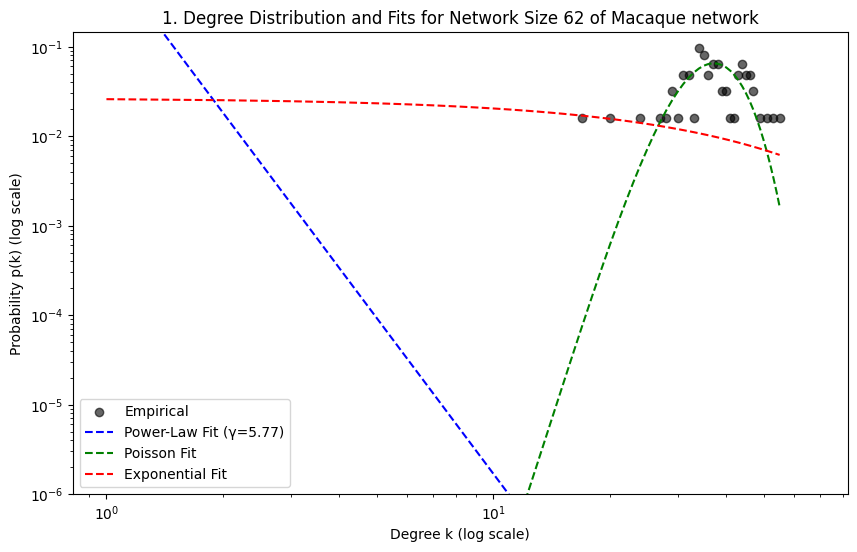

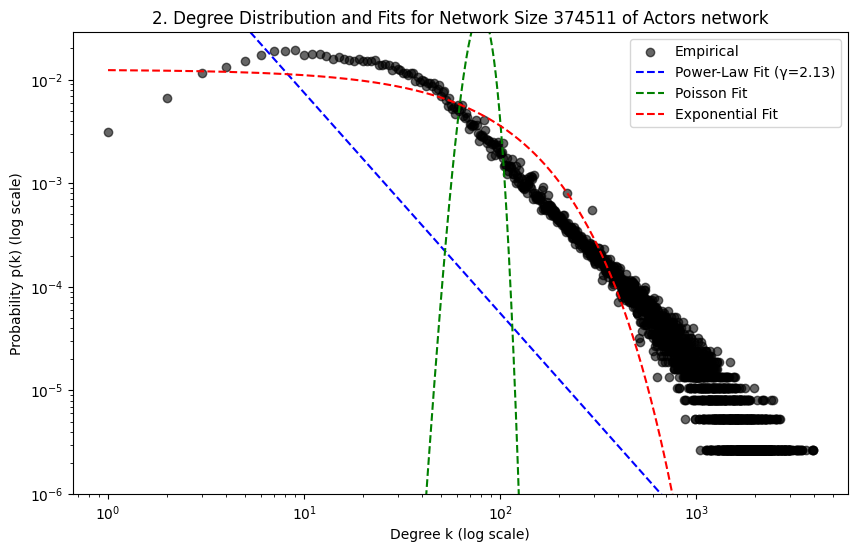

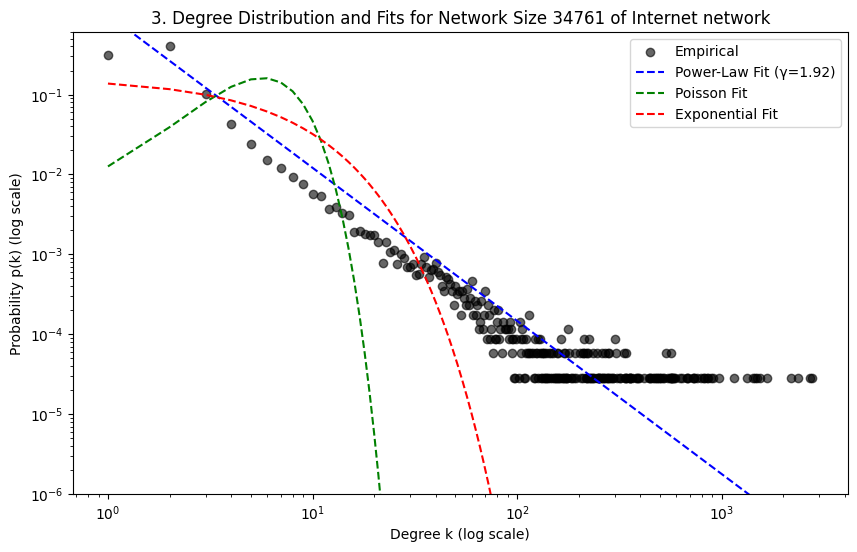

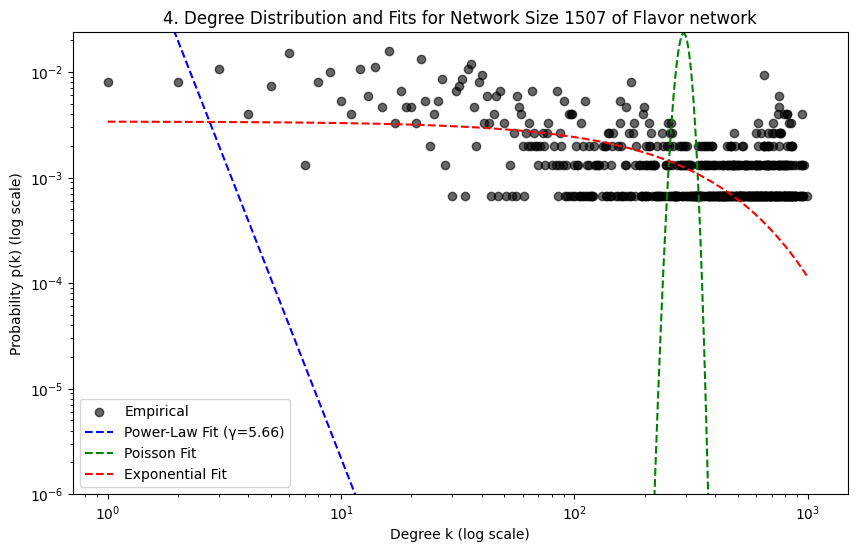

In [ ]:
i = 1
for name, g in graphs.items():
    degree_counts = np.bincount(degrees[name])
    degree_probabilities = degree_counts / len(degrees[name])

    gamma = gamma_values[name]

    lambda_k = np.mean(degrees[name])

    k_values = np.arange(
        1, len(degree_counts)
    )  # Start from 1 to avoid division by zero

    power_law_fit = k_values ** (-gamma)

    poisson_fit = poisson.pmf(k_values, lambda_k)
    # poisson_fit = lambda_k ** k_values / factorial(k_values) * np.exp(-lambda_k)

    exponential_fit = (1 / lambda_k) * np.exp(-k_values / lambda_k)

    plt.figure(figsize=(10, 6))

    plt.scatter(
        k_values, degree_probabilities[1:], color="black", label="Empirical", alpha=0.6
    )

    plt.plot(
        k_values,
        power_law_fit,
        color="blue",
        linestyle="--",
        label=f"Power-Law Fit (γ={gamma:.2f})",
    )

    plt.plot(k_values, poisson_fit, color="green", linestyle="--", label="Poisson Fit")

    plt.plot(
        k_values, exponential_fit, color="red", linestyle="--", label="Exponential Fit"
    )

    plt.xscale("log")
    plt.yscale("log")

    plt.xlim(0, max(degrees[name]) * 1.5)
    plt.ylim(1e-6, max(degree_probabilities) * 1.5)

    plt.xlabel("Degree k (log scale)")
    plt.ylabel("Probability p(k) (log scale)")
    plt.title(
        f"{i}. Degree Distribution and Fits for Network Size {len(g.nodes())} of {name} network"
    )
    plt.legend()
    plt.show()
    i += 1

### Which distribution is more likely to describe the data?
* **Macaque Network**: looks similar to exponential fit. Though some nodes form a pattern closer to the Poisson fit. A larger network with more nodes would lead to a more reliable interpretation
* **Actors Network**: The pattern is quite close to exponential fit. Though there is some deviation and the higher degree nodes resemeble a shifted power law fit.
* **Internet Network**: This is very clearly in line with the power law fit.
* **Flavor network**: This strongly resembles the exponential fit, with quite some noise.

## 2.3

**(1 point)** Based on the previous plot, determine whether the network under consideration is scale-free.



* Scale free networks are networks that exhibit a power law degree distribution
* Both Poisson and Exponential fit show a rapid decay of high degree nodes. This makes their distributions not scale free.

* **Macaque network**: Doesn't resemble power law fit and therefore is not scale free
* **Actors network**: Resembles both exponential fit and power law fit. From the scatter plot it is not fully clear whether the decay of high degree nodes is exponential or not. A slight tendency of decay can be seen, so it can be assumed that this trend will grow further, likely making the network not fully scale free.
* **Internet network**: This is very much in line with power law fit and with that scale free.
* **Flavor network**: This closely resembles an exponential fit and therefore exponential decay of higher degree nodes can be assumed, making it not scale free.